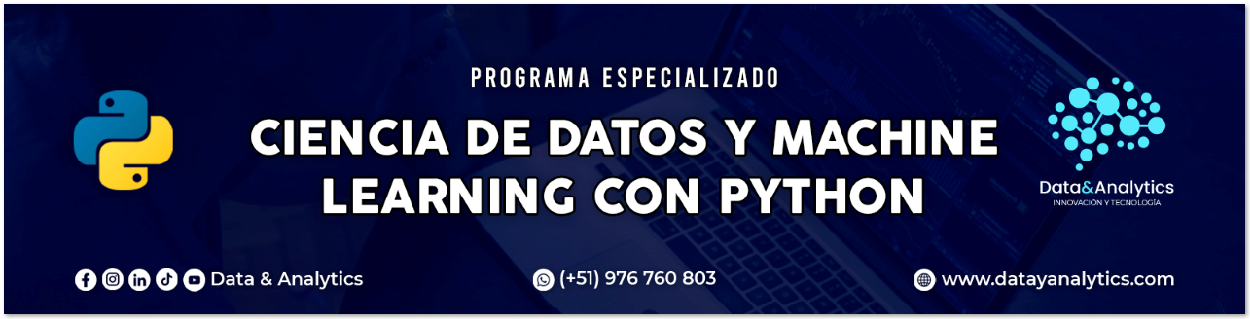

#DATA & ANALYTICS



----------------------------
SESIÓN N°8: K-means

Instructor: 

E-mail: cursos@datayanalytics.com

Web: www.datayanalytics.com

## Introducción

La agrupación en clústeres pertenece a las técnicas de aprendizaje automático no supervisadas.

La tarea principal de la agrupación en clústeres es descubrir grupos "naturales" en un conjunto de datos sin etiquetar. Esta es una tarea importante en el análisis de datos, ya que se utiliza en muchas aplicaciones científicas, de ingeniería y comerciales. La aplicación más conocida de la agrupación en clústeres es la segmentación de clientes (para un marketing eficiente), la segmentación de imágenes y la agrupación de documentos.
Hay muchos algoritmos de agrupamiento que se pueden dividir en dos tipos principales: jerárquicos y particionales.

* Los algoritmos <u> jerárquicos </u> dividen de forma recursiva un conjunto de datos en un subconjunto más pequeño hasta que un subconjunto contiene solo un elemento. Esto se puede representar con un dendrograma que parece un árbol. Puede construirse desde las hojas hasta el suelo (enfoque aglomerativo) o desde la raíz hasta las hojas (enfoque divisivo). En la agrupación jerárquica, no es necesario que especifique la cantidad de agrupaciones, pero debe definir una condición de terminación para el proceso de división / fusión. </li>

* <u>Partitional</u> Los algoritmos dividen un conjunto de datos en varios subconjuntos (grupos) según un criterio determinado. Para algunos algoritmos, el número de clústeres debe definirse a priori (por ejemplo, K-Means) y para otros no (DBSCAN). Definir el número de clústeres antes de ejecutar un algoritmo a menudo requiere un conocimiento de dominio específico que a menudo es un desafío (o incluso imposible) en muchas aplicaciones. Esto condujo al desarrollo de muchas heurísticas y enfoques simplificados que ayudaron a los analistas sin conocimiento del dominio a elegir el número apropiado de clústeres. </li>

Existe una gran cantidad de algoritmos de agrupamiento y, actualmente, no hay uno que domine a los demás. La elección del mejor depende de la base de datos en sí, del dominio de la aplicación y de los requisitos y expectativas del cliente.
Este cuaderno se centra en tres algoritmos de partición: K-Means, DBSCAN y Affinity Propagation. Todos están implementados en una conocida biblioteca de Python: Scikit-Learn.

<a id = "2"></a><br>
## Cargando las Libraria

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import unique
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

<a id = "3"></a><br>
## Load Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


En la estadística descriptica podemos ver que la edad minima que un cliente tiene es de 18 años y la máxima es de 70 años. por otro lado el ingreso mínimo de un cliente es 15K y el máximo es de 137k dólares.

In [ ]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Nuestro conjunto de dato no tiene valores nulos. Esto simplifica nuestro análisis y la manipulación de nuestro datos también, aunque es un escenario poco improbable en la vida real donde analizamos, donde pasamos una cantidad de tiempo limpiando nuestro datos antes de analizar su análisis.

## Análisis Exploratorio de datos

En esta parte haremos una investigación estadística de nuestra base de datos. Este punto es importante para cualquier análisis que nos ayude poder entender mejor nuestro conjunto de datos. En esta parte la trabajaremos en dos: Distribución y correlación.

### Distribución 
Investigaremos la distribución de una variable numérica. La data sera estratificada por genero- la única variables categorica.

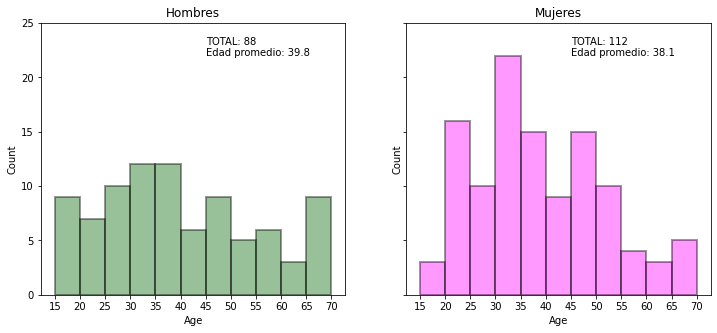

In [ ]:
import seaborn as sns
males_age = data[data['Gender']=='Male']['Age'] # Subconjunto de hombre por edad 
females_age =data[data['Gender']=='Female']['Age'] # Subconjunto de mujeres por edad

age_bins = range(15,75,5)

# Histograma de Hombres
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, color='darkgreen', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Hombres')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL: {}".format(males_age.count()))
ax1.text(45,22, "Edad promedio: {:.1f}".format(males_age.mean()))

# Histograma de Mujeres
sns.distplot(females_age, bins=age_bins, kde=False, color='fuchsia', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Mujeres')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL: {}".format(females_age.count()))
ax2.text(45,22, "Edad promedio: {:.1f}".format(females_age.mean()))

plt.show();

La edad promedio de los clientes hombres es mas estable que la de las mujeres (39.8 vs 38.1). La distribución de la edad de los hombres es más uniforme que la de las mujeres, podemos observar que el grupo de edad más grandes se encuentra entre 30 -35 años.

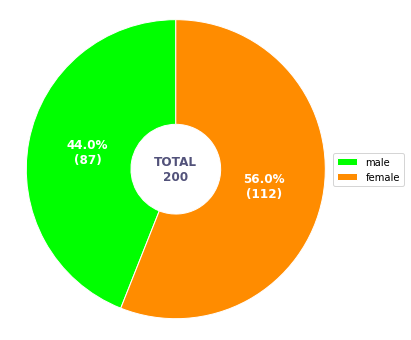

In [ ]:
def labeler(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

sizes = [males_age.count(),females_age.count()] # wedge sizes

fig0, ax1 = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax1.pie(sizes,
                                   autopct=lambda pct: labeler(pct, sizes),
                                   radius=1,
                                   colors=['lime','darkorange'],
                                   startangle=90,
                                   textprops=dict(color="w"),
                                   wedgeprops=dict(width=0.7, edgecolor='w'))

ax1.legend(wedges, ['male','female'],
           loc='center right',
           bbox_to_anchor=(0.7, 0, 0.5, 1))

plt.text(0,0, 'TOTAL\n{}'.format(data['Age'].count()),
         weight='bold', size=12, color='#52527a',
         ha='center', va='center')

plt.setp(autotexts, size=12, weight='bold')
ax1.axis('equal')  # Equal aspect ratio
plt.show()

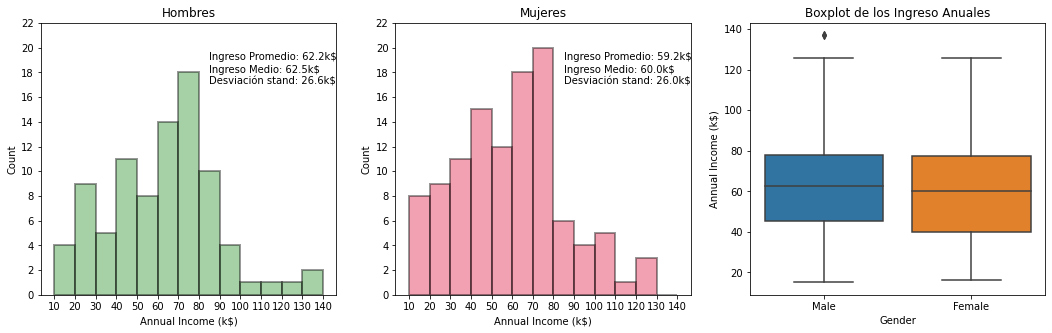

In [ ]:
males_income = data[data['Gender']=='Male']['Annual Income (k$)'] # subset with males income
females_income = data[data['Gender']=='Female']['Annual Income (k$)'] # subset with females income

my_bins = range(10,150,10)

# Histograma de Hombres
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_income, bins=my_bins, kde=False, color='forestgreen', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Hombres')
ax1.set_ylabel('Count')
ax1.text(85,19, "Ingreso Promedio: {:.1f}k$".format(males_income.mean()))
ax1.text(85,18, "Ingreso Medio: {:.1f}k$".format(males_income.median()))
ax1.text(85,17, "Desviación stand: {:.1f}k$".format(males_income.std()))

# Histograma mujeres
sns.distplot(females_income, bins=my_bins, kde=False, color='crimson', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Mujeres')
ax2.set_ylabel('Count')
ax2.text(85,19, "Ingreso Promedio: {:.1f}k$".format(females_income.mean()))
ax2.text(85,18, "Ingreso Medio: {:.1f}k$".format(females_income.median()))
ax2.text(85,17, "Desviación stand: {:.1f}k$".format(females_income.std()))

# boxplot
sns.boxplot(x='Gender', y='Annual Income (k$)', data=data, ax=ax3)
ax3.set_title('Boxplot de los Ingreso Anuales')
plt.show();

El ingreso promedio de los hombres es mas alto que el de las mujeres $(62.2k$ vs. $59.2k)$. También el ingreso medio de los hombres $62.5k$ es más alto que el de las mujeres $60k$. La desviación estándar es similar para ambos grupos.

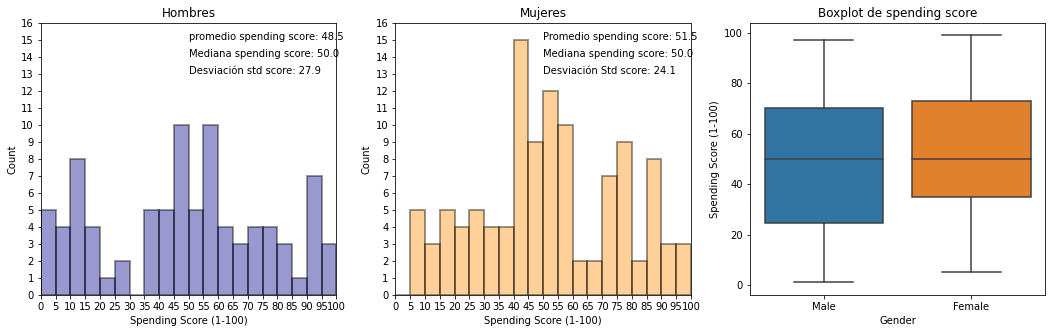

In [ ]:
males_spending = data[data['Gender']=='Male']['Spending Score (1-100)'] # subset with males age
females_spending = data[data['Gender']=='Female']['Spending Score (1-100)'] # subset with females age

spending_bins = range(0,105,5)

# Histograma de los hombres
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_spending, bins=spending_bins, kde=False, color='darkblue', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,17,1))
ax1.set_ylim(0,16)
ax1.set_title('Hombres')
ax1.set_ylabel('Count')
ax1.text(50,15, "promedio spending score: {:.1f}".format(males_spending.mean()))
ax1.text(50,14, "Mediana spending score: {:.1f}".format(males_spending.median()))
ax1.text(50,13, "Desviación std score: {:.1f}".format(males_spending.std()))

# Histograma de las Mujeres
sns.distplot(females_spending, bins=spending_bins, kde=False, color='darkorange', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(spending_bins)
ax2.set_xlim(0,100)
ax2.set_yticks(range(0,17,1))
ax2.set_ylim(0,16)
ax2.set_title('Mujeres')
ax2.set_ylabel('Count')
ax2.text(50,15, "Promedio spending score: {:.1f}".format(females_spending.mean()))
ax2.text(50,14, "Mediana spending score: {:.1f}".format(females_spending.median()))
ax2.text(50,13, "Desviación Std score: {:.1f}".format(females_spending.std()))

# boxplot
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data, ax=ax3)
ax3.set_title('Boxplot de spending score')
plt.show()

plt.show()

El promedio de Spending score para las mujeres (51.5) es más alto que el del hombre (48.5).

In [ ]:
medians_by_age_group = data.groupby(["Gender",pd.cut(data['Age'], age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender', 'Age_group'])
medians_by_age_group.reset_index(inplace=True)

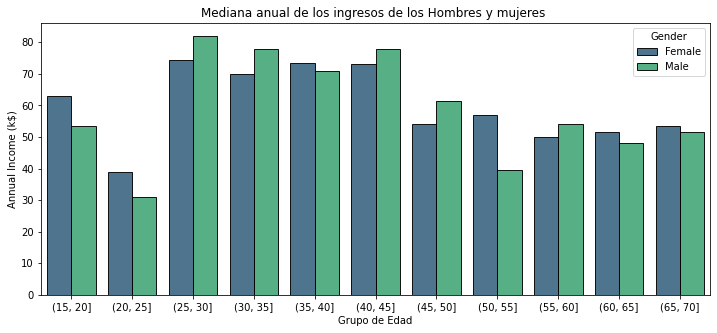

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Gender', data=medians_by_age_group,
            palette="viridis",
            alpha=0.9,edgecolor='black',
            ax=ax)
ax.set_title('Mediana anual de los ingresos de los Hombres y mujeres ')
ax.set_xlabel('Grupo de Edad')
plt.show()

En el gráfico de barra que se muestra arriba, se puede observar que los clientes más adinerado estan entre la edad de 25 a 45 años.

### Correlación

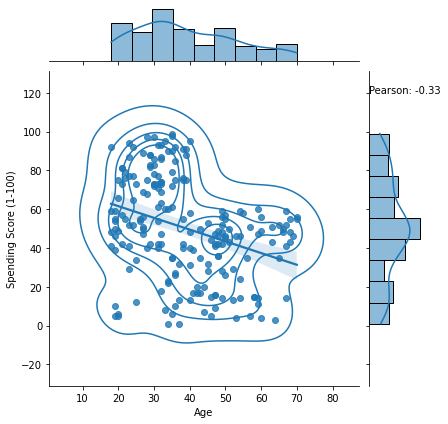

In [ ]:
from scipy.stats import pearsonr

# Calculando la correlacio de Pearson
corr, _ = pearsonr(data['Age'], data['Spending Score (1-100)'])

jp = (sns.jointplot('Age', 'Spending Score (1-100)', data=data,
                    kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)

plt.text(0,120, 'Pearson: {:.2f}'.format(corr))
plt.show()

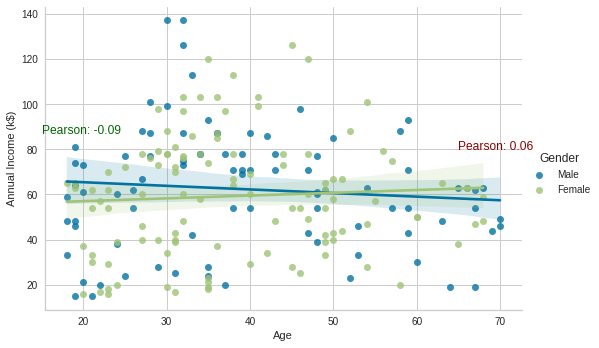

In [ ]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

sns.lmplot('Age', 'Annual Income (k$)', data=data, hue='Gender',
          aspect=1.5)

plt.text(15,87, 'Pearson: {:.2f}'.format(corr1), color='darkgreen')
plt.text(65,80, 'Pearson: {:.2f}'.format(corr2), color='darkred')

plt.show()

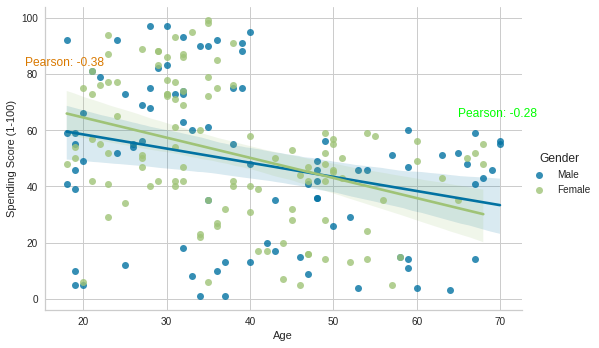

In [ ]:
# Calculando la correlación de Pearson
corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)

sns.lmplot('Age', 'Spending Score (1-100)', data=data, hue='Gender',
          aspect=1.5)

plt.text(65,65, 'Pearson: {:.2f}'.format(corr1), color='lime')
plt.text(13,83, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

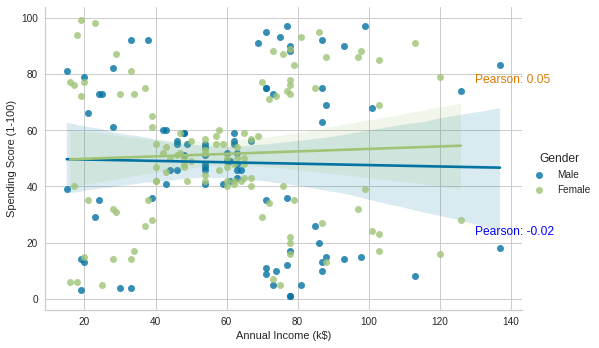

In [ ]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)

sns.lmplot('Annual Income (k$)', 'Spending Score (1-100)', data=data, hue='Gender',
          aspect=1.5)

plt.text(130,23, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(130,77, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

<a id = "4"></a><br>
## 1 - K-Means 

**K-means** es la implementación más simple del principio de máxima separación y máxima cohesión interna. Supongamos que tenemos un conjunto de datos $X\in ℜ^{M×N}$ (es decir, $M N$ muestras dimensionales) que queremos dividir en $K$ grupos y un conjunto de $K$ centroides correspondientes a las medias de las muestras asignadas a cada grupo $K_j$:

$$M^{(0)}=\{\bar \mu_{0}^{(0)}, \bar \mu_{1}^{(0)}, \cdots, \bar \mu_{K}^{(0)}   \} $$
donde 
$$ \bar \mu_{i}^{(t)} \in \mathbb{R}^N $$

El conjunto $M$ y los centroides tienen un índice adicional (como un superíndice) que indica el paso iterativo. A partir de una suposición inicial $M^{(0)}$, K-means intenta minimizar una función objetivo llamada inercia (es decir, la distancia total promedio dentro del grupo entre las muestras asignadas a un grupo $K_j$ y su centroide $\mu_j$):
$$S(t)= \sum_{k=1}^{K} \sum_{\bar x_i\in K_j} ||\bar x_i -\bar \mu_{k}^{t} ||^2 $$

Es fácil entender que $S(t)$ no se puede considerar como una medida absoluta porque su valor está muy influenciado por la varianza de las muestras.
Sin embargo, $S(t+1) < S(t)$ implica que los centroides se están acercando a una posición óptima donde los puntos asignados a un grupo tienen la menor distancia posible al centroide correspondiente. Por lo tanto, el procedimiento iterativo (también conocido como algoritmo de Lloyd) comienza inicializando $M^{(0)}$ con valores aleatorios. El siguiente paso es la asignación de cada muestra $x_i\in X$ al conglomerado cuyo centroide tiene la menor distancia de $x_i$:

$$c(\bar x_i;M^{(t)})=argmin_{j}^{(t)} d(\bar x_i,\bar \mu_{j}^{(t)}) $$

Una vez que se han completado todas las asignaciones, los nuevos centroides se vuelven a calcular como medias aritméticas:

$$\bar \mu_{j}^{(t)}=\frac{1}{N_{k_j}} \sum_{\bar x_i\in K_j}= \langle\bar x_j \rangle K_j $$

El procedimiento se repite hasta que los centroides dejen de cambiar (esto implica también una secuencia $S(0) > S(1) > ... > S(t_{end})$). El lector debería haber entendido de inmediato que el tiempo de cálculo está muy influenciado por la suposición inicial. Si $M^{(0)}$ está muy cerca de $M^{(t_{end})}$, algunas iteraciones pueden encontrar la configuración óptima. Por el contrario, cuando $M^{(0)}$ es puramente aleatorio, la probabilidad de una elección inicial ineficiente es cercana a 1 (es decir, cada elección aleatoria uniforme inicial es casi equivalente en términos de complejidad computacional).

### Implementación de K-means
Para encontrar un número apropiado de grupos, se utilizará el método del codo. En este método para este caso, se calculará la inercia para un número de grupos entre 2 y 10. La regla es elegir el número de agrupaciones en las que ve un nudo o "un codo" en el gráfico.

## Método del codo

El `KElbowVisualizer` implementa el método "codo" para ayudar a los científicos de datos a seleccionar la cantidad óptima de clústeres ajustando el modelo con un rango de valores para $K$. Si el gráfico de líneas se parece a un brazo, entonces el "codo" (el punto de inflexión en el curva) es una buena indicación de que el modelo subyacente se ajusta mejor en ese punto. En el visualizador, el "codo" se anotará con una línea discontinua.

Para demostrarlo, en el siguiente ejemplo, `KElbowVisualizer` ajusta(`fit`) el modelo `KMeans()` para un rango de valores $K$ de 1 a 12 en un conjunto de datos bidimensional de muestra con 8 grupos de puntos aleatorios. Cuando el modelo se ajusta con 8 clústeres, podemos ver una línea que anota el "codo" en el gráfico, que en este caso sabemos que es el número óptimo.

In [ ]:
data.drop(['CustomerID'], axis=1, inplace=True)
data.drop(['Gender'], axis=1, inplace=True)

data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


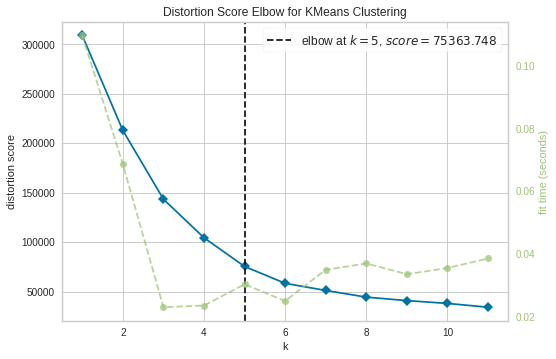

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(data)        # Ajustar los datos a la visualizador
visualizer.show();        

De forma predeterminada, la métrica del parámetro de puntuación se establece en distorsión, que calcula la suma de las distancias al cuadrado desde cada punto hasta su centro asignado. Sin embargo, también se pueden usar otras dos métricas con KElbowVisualizer: `silhouette` y `calinski_harabasz`. La puntuación de silueta calcula el coeficiente de silueta medio de todas las muestras, mientras que la puntuación de calinski_harabasz calcula la relación de dispersión entre y dentro de los grupos.

El `KElbowVisualizer` también muestra la cantidad de tiempo para entrenar el modelo de agrupación por K como una línea verde discontinua, pero se puede ocultar configurando `timings=False`. En el siguiente ejemplo, usaremos la puntuación `calinski_harabasz` y ocultaremos el tiempo para ajustar el modelo.

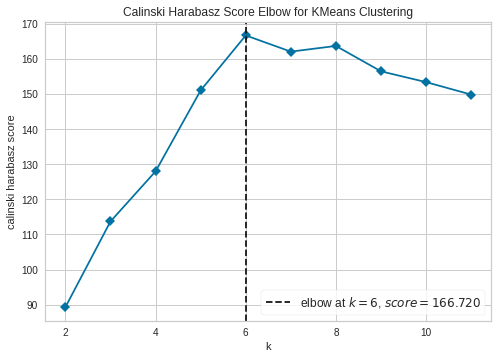

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz', timings=False)

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show();  

De forma predeterminada, el parámetro `locate_elbow` se establece en Verdadero, que encuentra automáticamente el "codo" que probablemente corresponde al valor óptimo de k utilizando el "algoritmo de detección del punto de inflexión". Sin embargo, los usuarios pueden desactivar la función configurando `locate_elbow=False`. 

In [ ]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(data) # Inicializamos y entrenamos K-Means model

KM5_clustered = data.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

In [ ]:
KM5_clustered

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,3
1,21,15,81,1
2,20,16,6,3
3,23,16,77,1
4,31,17,40,3
...,...,...,...,...
195,35,120,79,2
196,45,126,28,4
197,32,126,74,2
198,32,137,18,4


Los centros de cluster

In [ ]:
centers = KM_5_clusters.cluster_centers_

centers

array([[43.08860759, 55.29113924, 49.56962025],
       [25.52173913, 26.30434783, 78.56521739],
       [32.69230769, 86.53846154, 82.12820513],
       [45.2173913 , 26.30434783, 20.91304348],
       [40.66666667, 87.75      , 17.58333333]])

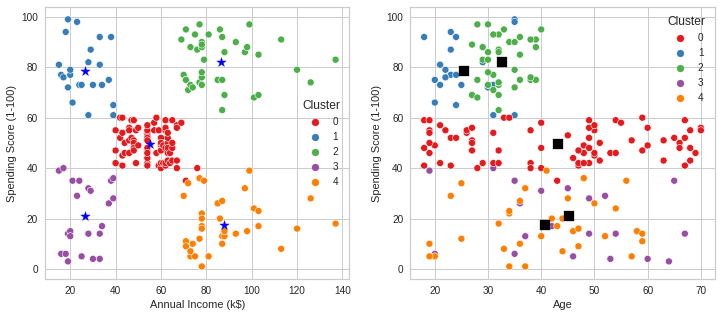

In [ ]:
import seaborn as sns
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='*', s=100, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=100, c="black")
plt.show();

## Coeficiente y visualización silhouette

El coeficiente de silueta se utiliza cuando se desconoce la verdad sobre el terreno del conjunto de datos y calcula la densidad de los clústeres calculados por el modelo. El puntaje se calcula promediando el coeficiente de silueta para cada muestra, calculado como la diferencia entre la distancia promedio dentro del grupo y la distancia media del grupo más cercano para cada muestra, normalizada por el valor máximo. Esto produce una puntuación entre 1 y -1, donde 1 son clústeres muy densos y -1 es un agrupamiento completamente incorrecto.

El visualizador de silueta muestra el coeficiente de silueta para cada muestra por grupo, visualizando qué grupos son densos y cuáles no. Esto es especialmente útil para determinar el desequilibrio de grupos o para seleccionar un valor para K comparando varios visualizadores.

**Silhouette Score:** Esta es una mejor medida para decidir el número de grupos que se formularán a partir de los datos. 

In [ ]:
score = metrics.silhouette_score(data, KM_5_clusters.labels_)

print("Score = ", score)

Score =  0.44428597560893024


Esta función devuelve el coeficiente de silueta para cada muestra.

El mejor valor es 1 y el peor valor es -1. Los valores cercanos a 0 indican grupos superpuestos.

In [ ]:
score1 = metrics.silhouette_samples(data, KM_5_clusters.labels_, metric='euclidean')
print("Score = ", score1)

Score =  [ 0.11330023  0.69675032  0.44241407  0.702352    0.25414423  0.70320057
  0.54932786  0.65736919  0.51208013  0.64909334  0.49360144  0.58299182
  0.56336403  0.7228246   0.57362136  0.72586863  0.39920148  0.59222156
  0.48855828  0.58744512  0.37602626  0.69304848  0.57693698  0.64720819
  0.5708669   0.69141414  0.42311946  0.32954018  0.41848781  0.69199782
  0.51184348  0.65154809  0.52168178  0.62361218  0.54423372  0.6648445
  0.51157546  0.55797761  0.32900177  0.56815518  0.07116395  0.56547097
  0.04781542  0.11881899  0.28445199  0.33516161  0.34806201  0.21482023
  0.17046144  0.17154625  0.39978346  0.02533197  0.21205731  0.35730404
  0.31626847  0.22388636  0.41437047  0.24195759  0.29032522  0.39125715
  0.35328629  0.07992448  0.3704745   0.42762189  0.41195569  0.01459085
  0.49958097  0.33719976  0.02939535  0.44013012  0.3806269   0.39975239
  0.44596174  0.48238009  0.47684191  0.37566411  0.56577992  0.5527019
  0.36120686  0.47233804  0.52337681  0.4965

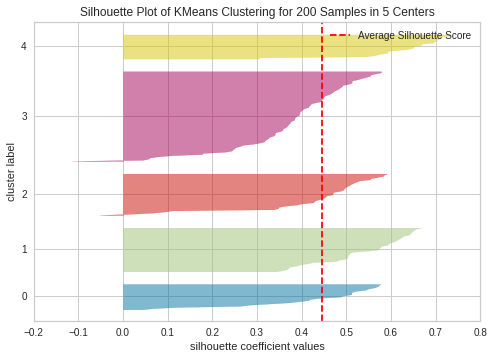

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl


# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show();

<a id = "8"></a><br>
# 2 - Mini Batch K-Means

El `MiniBatchKMeans()` es una variante del algoritmo `KMeans` que utiliza mini-batches para reducir el tiempo de cálculo, mientras intenta optimizar la misma función objetivo. Los mini-batches son subconjuntos de los datos de entrada, muestreados aleatoriamente en cada iteración de entrenamiento. Estos mini-batches reducen drásticamente la cantidad de cómputo requerida para converger a una solución local. A diferencia de otros algoritmos que reducen el tiempo de convergencia de k-means, k-means de mini-batches produce resultados que, por lo general, son ligeramente peores que el algoritmo estándar.

El algoritmo itera entre dos pasos principales, similar a vanilla k-means. En el primer paso, las muestras se extraen aleatoriamente del conjunto de datos para formar un mini-batches. Luego se asignan al centroide más cercano. En el segundo paso, se actualizan los centroides. A diferencia de k-means, esto se hace por muestra. Para cada muestra en el mini-batches, el centroide asignado se actualiza tomando el promedio de transmisión de la muestra y todas las muestras anteriores asignadas a ese centroide. Esto tiene el efecto de disminuir la tasa de cambio de un centroide con el tiempo. Estos pasos se realizan hasta que se alcanza la convergencia o un número predeterminado de iteraciones.

MiniBatchKMeans converge más rápido que KMeans, pero se reduce la calidad de los resultados.

## Método del codo

El `KElbowVisualizer` implementa el método "codo" para ayudar a los científicos de datos a seleccionar la cantidad óptima de clústeres ajustando el modelo con un rango de valores para $K$. Si el gráfico de líneas se parece a un brazo, entonces el "codo" (el punto de inflexión en el curva) es una buena indicación de que el modelo subyacente se ajusta mejor en ese punto. En el visualizador, el "codo" se anotará con una línea discontinua.

Para demostrarlo, en el siguiente ejemplo, `KElbowVisualizer` ajusta(`fit`) el modelo `KMeans()` para un rango de valores $K$ de 1 a 12 en un conjunto de datos bidimensional de muestra con 8 grupos de puntos aleatorios. Cuando el modelo se ajusta con 8 clústeres, podemos ver una línea que anota el "codo" en el gráfico, que en este caso sabemos que es el número óptimo.

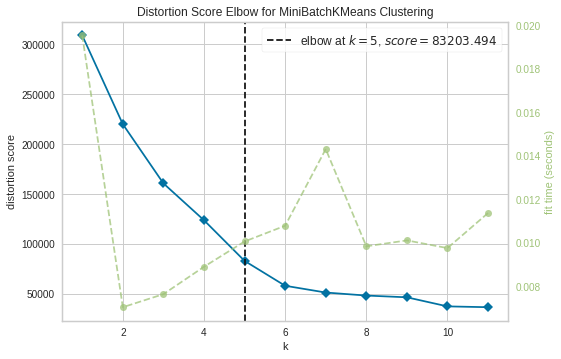

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model_mini = MiniBatchKMeans()
visualizer = KElbowVisualizer(model_mini, k=(1,12))

visualizer.fit(data)        # Ajustar los datos a la visualizador
visualizer.show();

Una vez que hemos encontrado el $K$ óptimo, procedemos a implementar el modelo

In [ ]:
model_mini = MiniBatchKMeans(n_clusters=6)
model_mini.fit(data)
#
yhat_mini = model_mini.predict(data)
clusters_mini = unique(yhat_mini)
print("Clusters de Mini Batch KMeans.",clusters_mini)
labels_mini = model_mini.labels_
centroids_mini = model_mini.cluster_centers_

Clusters de Mini Batch KMeans. [0 1 2 3 4 5]


## Agregando clustering al Dataset

In [ ]:

cluster_mini = data.copy()
cluster_mini.loc[:,'Cluster'] = labels_mini

In [ ]:
cluster_mini

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,5
1,21,15,81,3
2,20,16,6,5
3,23,16,77,3
4,31,17,40,5
...,...,...,...,...
195,35,120,79,1
196,45,126,28,2
197,32,126,74,1
198,32,137,18,2


## Visualización de los Clustering

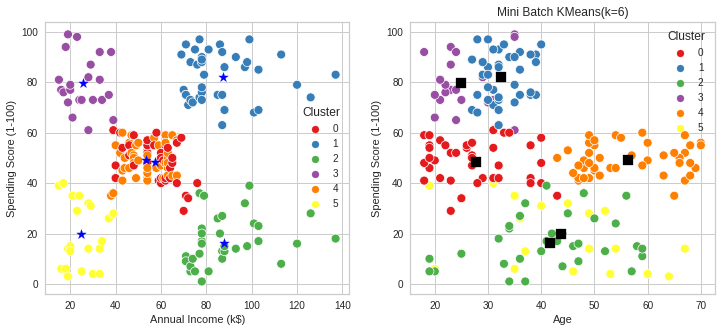

In [ ]:
import seaborn as sns
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))

plt.title('Mini Batch KMeans(k=6)')
scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=cluster_mini,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full',s=80)

plt.title('Mini Batch KMeans(k=6)')
sns.scatterplot('Age', 'Spending Score (1-100)', data=cluster_mini,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=80)

axes[0].scatter(model_mini.cluster_centers_[:,1],model_mini.cluster_centers_[:,2], marker='*', s=100, c="blue")
axes[1].scatter(model_mini.cluster_centers_[:,0],model_mini.cluster_centers_[:,2], marker='s', s=100, c="black")
plt.show();

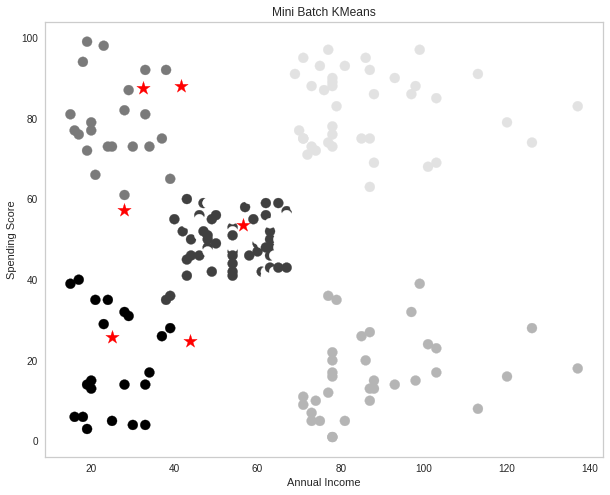

In [ ]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=labels_mini, s=100)

plt.scatter(centroids_mini[:,0], centroids_mini[:,1], color='red', marker='*', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Mini Batch KMeans')
plt.grid()
plt.show()

## Coeficiente y visualización silhouette

El coeficiente de silueta se utiliza cuando se desconoce la verdad sobre el terreno del conjunto de datos y calcula la densidad de los clústeres calculados por el modelo. El puntaje se calcula promediando el coeficiente de silueta para cada muestra, calculado como la diferencia entre la distancia promedio dentro del grupo y la distancia media del grupo más cercano para cada muestra, normalizada por el valor máximo. Esto produce una puntuación entre 1 y -1, donde 1 son clústeres muy densos y -1 es un agrupamiento completamente incorrecto.

El visualizador de silueta muestra el coeficiente de silueta para cada muestra por grupo, visualizando qué grupos son densos y cuáles no. Esto es especialmente útil para determinar el desequilibrio de grupos o para seleccionar un valor para K comparando varios visualizadores.

El Coeficiente de Silueta se define para cada muestra y se compone de dos puntuaciones:

* a: La distancia media entre una muestra y todos los demás puntos de la misma clase.

* b: La distancia media entre una muestra y todos los demás puntos en el siguiente grupo más cercano.

El Coeficiente de silueta s para una sola muestra se da como:

$$s = \frac{b - a}{max(a, b)}$$

### Ventajas y Desventajas

**Ventajas**
* La puntuación está limitada entre -1 para un agrupamiento incorrecto y +1 para un agrupamiento muy denso. Las puntuaciones alrededor de cero indican grupos superpuestos.
* La puntuación es más alta cuando los conglomerados son densos y bien separados, lo que se relaciona con un concepto estándar de conglomerado.

**inconvenientes**
* El coeficiente de silueta es generalmente más alto para los clústeres convexos que para otros conceptos de clústeres, como los clústeres basados en la densidad como los obtenidos a través de DBSCAN.

In [ ]:
score_mini = metrics.silhouette_score(data,labels_mini, metric='euclidean')

print("Score Mini Batch K-Means = ", score_mini)

Score Mini Batch K-Means =  0.45095124469943243


Esta función devuelve el coeficiente de silueta para cada muestra.

El mejor valor es 1 y el peor valor es -1. Los valores cercanos a 0 indican grupos superpuestos.

In [ ]:
score1 = metrics.silhouette_samples(data, labels_mini, metric='euclidean')
print("Score = ", score1)

Score =  [ 0.10605178  0.66676886  0.4427712   0.67234794  0.24996197  0.67462815
  0.54818921  0.62694884  0.50837365  0.6206617   0.48876108  0.55096999
  0.55958741  0.69293546  0.5721975   0.69637945  0.39750391  0.58007841
  0.48336504  0.55583994  0.37409163  0.66921374  0.5746703   0.62141509
  0.5670255   0.66263175  0.41779294  0.32436053  0.41462918  0.66584054
  0.50777584  0.64048363  0.51817769  0.60443929  0.54045335  0.64872565
  0.50840892  0.54769103  0.32570247  0.57036165  0.05183812  0.54512805
  0.03197359  0.15253488  0.27460144  0.36836993  0.35289766  0.17463172
  0.16842041  0.17128431  0.41237107 -0.01306896  0.17163932  0.36868715
  0.33232241  0.23902789  0.42905448  0.26155491  0.24285775  0.40834452
  0.36948684 -0.00870965  0.38818035  0.43413496  0.42975214  0.0368812
  0.50830976  0.35598518  0.02195378  0.41661943  0.39696651  0.4136732
  0.46370047  0.49743537  0.49391965  0.32880557  0.56199841  0.55879505
  0.31022144  0.48623062  0.53881697  0.4800

In [ ]:
#Otra forma de Gráficar
#from yellowbrick.cluster import silhouette_visualizer
#silhouette_visualizer(MiniBatchKMeans(5, random_state=42), data, colors='yellowbrick')

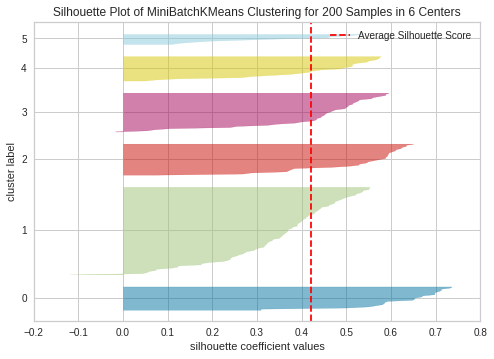

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl


# Instantiate the clustering model and visualizer
model_mini = MiniBatchKMeans(n_clusters=6, random_state=1234)
visualizer = SilhouetteVisualizer(model_mini, colors='yellowbrick')

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show();

#DATA & ANALYTICS





Web: www.datayanalytics.com